In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
citydata = "data/city_data.csv"
ridedata = "data/ride_data.csv"

# Read the City and Ride Data
citydata = pd.read_csv(citydata)

In [2]:
ridedata = pd.read_csv(ridedata)

In [3]:
# Combine the data into a single dataset
# Display the data table for preview

cityrides = pd.merge(ridedata, citydata, on="city")

In [4]:
cityrides.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [5]:
# Obtain the x and y coordinates for each of the three city types

# separate by city type
urban = cityrides.loc[(cityrides['type'] == 'Urban')]
suburban = cityrides.loc[(cityrides['type'] == 'Suburban')]
rural = cityrides.loc[(cityrides['type'] == 'Rural')]

# groupby city, take mean of fares by city for each city type
urban_avgfare = urban.groupby(['city'])['fare'].mean()
suburban_avgfare = suburban.groupby(['city'])['fare'].mean()
rural_avgfare = rural.groupby(['city'])['fare'].mean()

# groupby city, count total rides per city
urban_totalrides = urban.groupby(['city']).count()['ride_id']
suburban_totalrides = suburban.groupby(['city']).count()['ride_id']
rural_totalrides = rural.groupby(['city']).count()['ride_id']

# groupby city, count total drivers per
urban_totaldrivers = urban.groupby(['city'])['driver_count'].value_counts()
suburban_totaldrivers = suburban.groupby(['city'])['driver_count'].value_counts()
rural_totaldrivers = rural.groupby(['city'])['driver_count'].value_counts()



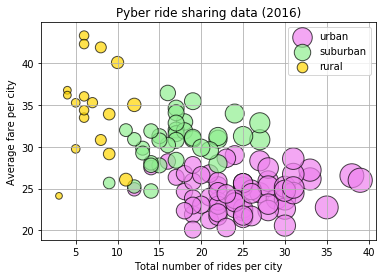

In [30]:
# Build the scatter plots for each city types

# urban scatter plot
plt.scatter(urban_totalrides, urban_avgfare, s=urban_totaldrivers*15, edgecolor='black', color='violet', marker='o', alpha=0.7, label='urban')
# suburban scatter
plt.scatter(suburban_totalrides, suburban_avgfare, s=suburban_totaldrivers*15, edgecolor='black', color='lightgreen', marker='o', alpha=0.7, label='suburban')
# rural
plt.scatter(rural_totalrides, rural_avgfare, s=rural_totaldrivers*15, edgecolor='black', color='gold', marker='o', alpha=0.7, label='rural')

# Incorporate the other graph properties

plt.grid()
plt.xlabel('Total number of rides per city')
plt.ylabel('Average fare per city')
plt.title('Pyber ride sharing data (2016)')

# Create a legend
plt.legend(loc='upper-right')

# Save Figure
plt.savefig('pyberscatter.png')

# Show plot
plt.show()

## Total Fares by City Type

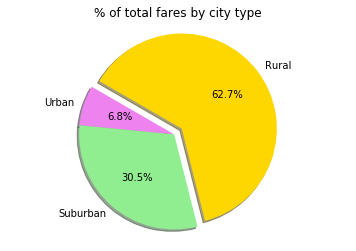

In [44]:
# Calculate Type Sums
type_totalfares = cityrides.groupby(['type'])['fare'].sum()
# Build Pie Chart
labels = ['Urban', 'Suburban', 'Rural']
colors = ['violet', 'lightgreen', 'gold']
explode = [0, 0, 0.1]
plt.pie(type_totalfares, colors=colors, labels=labels, startangle=160, autopct="%1.1f%%", explode=explode, shadow=True)
plt.axis('equal')
plt.title('% of total fares by city type')
# Save Figure
plt.savefig('faresbytype.png')
plt.show()

## Total Rides by City Type

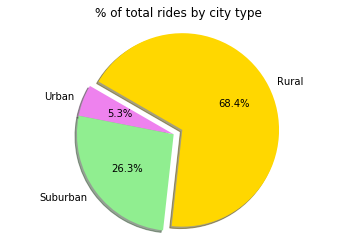

In [50]:
# Calculate Ride Percents
type_totalrides = cityrides.groupby(['type'])['ride_id'].count()

# Build Pie Chart
labels = ['Urban', 'Suburban', 'Rural']
colors = ['violet', 'lightgreen', 'gold']
explode = [0, 0, 0.1]
plt.pie(type_totalrides, colors=colors, labels=labels, startangle=160, autopct="%1.1f%%", explode=explode, shadow=True)
plt.axis('equal')
plt.title('% of total rides by city type')
# Save Figure
plt.savefig('ridesbytype.png')
plt.show()

## Total Drivers by City Type

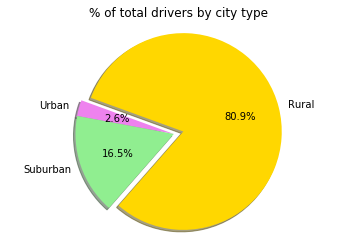

In [51]:
# Calculate Driver Percents
type_totaldrivers = citydata.groupby(['type'])['driver_count'].sum()

# Build Pie Chart
labels = ['Urban', 'Suburban', 'Rural']
colors = ['violet', 'lightgreen', 'gold']
explode = [0, 0, 0.1]
plt.pie(type_totaldrivers, colors=colors, labels=labels, startangle=160, autopct="%1.1f%%", explode=explode, shadow=True)
plt.axis('equal')
plt.title('% of total drivers by city type')
# Save Figure
plt.savefig('driversbytype.png')
plt.show()